# Repeat the simulation

In the last section you simulated 10 coin tosses and you may or may not have obtained 5 heads. 

So far so good.

But the question we actually needed to answer was:

"What proportion of the time we would obtain exacly 5 heads if we repeated the process of tossing the coin 10 times again and again?"

To answer this we need to get 10 coin tosses and count the heads not once, but lots of times. 

The computer can easily do this in a few milliseconds, even though it would take us ages with a real coin.

## 10,000 times 10 coin tosses

We are going to simulate tossing the coin 10 times and counting how many head we get, 10,000 times over. This will give us a sense of the frequency of each different outcome (0 heads, 1 head, 2 heads.... 10 heads)


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

Let's repeat our 10-coin-toss 'experiment' 10,000 times and each time record the value of $k$, the number of heads

In [2]:
nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(10,0.5)

OK, now we have an array with 10,000 entries showing how many heads we got out of 10 coin tosses, in each of 10,000 repeats.

We will need to summarize that, perhaps in a histogram

<Axes: ylabel='count'>

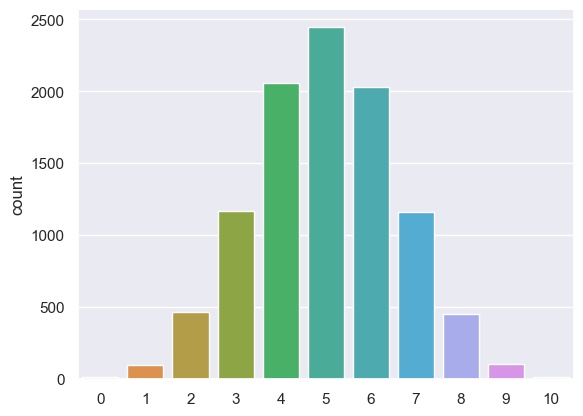

In [3]:
sns.countplot(x=k, order=range(11)) 

# n.b. argument 'order' sets the x-axis values for which to plot counts - 
# here this was the numbers 0,1,2....10, given by range(11)

Or perhaps we would like to know what proportion of times we get 8 or more heads out of 10 coin tosses?

In [4]:
sum(k>=8)/nReps

0.0568

... or what proportion of times we get exactly 8/10 heads?

In [5]:
sum(k==8)/nReps

0.0451